## I Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np


# II Data Loading

In [2]:
df = pd.read_csv('C:/Users/USER/anaconda3/envs/rmt-23/Final_project/histori_perak_cleaned.csv')
df.head()

,Tanggal,Harga
0,2023-10-29,23750.0
1,2023-10-22,23505.0
2,2023-10-15,23880.0
3,2023-10-08,22990.0
4,2023-10-01,22410.0


In [16]:
df_tokped = pd.read_csv('C:/Users/USER/anaconda3/envs/rmt-23/Final_project/Tokped_clean.csv')

In [17]:
df_bupak = pd.read_csv('C:/Users/USER/anaconda3/envs/rmt-23/Final_project/Bukalapak_clean.csv')

In [18]:
df_blibli = pd.read_csv('C:/Users/USER/anaconda3/envs/rmt-23/Final_project/Blibli_clean.csv')

## III Data Cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Tanggal  527 non-null    object 
 1   Harga    527 non-null    float64
dtypes: float64(1), object(1)
memory usage: 8.4+ KB


In [4]:
df.dropna(inplace=True)

df.drop_duplicates()

,Tanggal,Harga
0,2023-10-29,23750.0
1,2023-10-22,23505.0
2,2023-10-15,23880.0
3,2023-10-08,22990.0
4,2023-10-01,22410.0
...,...,...
522,2013-12-08,20480.0
523,2013-12-01,20010.0
524,2013-11-24,20300.0
525,2013-11-17,20800.0


In [5]:
df['Tanggal'] = pd.to_datetime(df['Tanggal'])

# Extract day, month, and year into separate columns
df['Day'] = df['Tanggal'].dt.day
df['Month'] = df['Tanggal'].dt.month
df['Year'] = df['Tanggal'].dt.year


df.set_index('Tanggal', inplace=True)

pergantian_harga_quarter = df.resample('Q').agg({'Harga': 'first'}).diff()

In [6]:
df.head()

,Harga,Day,Month,Year
Tanggal,,,,
2023-10-29,23750.0,29,10,2023
2023-10-22,23505.0,22,10,2023
2023-10-15,23880.0,15,10,2023
2023-10-08,22990.0,8,10,2023
2023-10-01,22410.0,1,10,2023


In [7]:
df.head()

,Harga,Day,Month,Year
Tanggal,,,,
2023-10-29,23750.0,29,10,2023
2023-10-22,23505.0,22,10,2023
2023-10-15,23880.0,15,10,2023
2023-10-08,22990.0,8,10,2023
2023-10-01,22410.0,1,10,2023


## IV Exploratory Data Analysis (EDA)

In [8]:
df.describe()

,Harga,Day,Month,Year
count,527.000000,527.000000,527.000000,527.000000
mean,19651.925996,15.645161,6.510436,2018.313093
std,3942.976947,8.856551,3.465663,2.885436
min,14205.000000,1.000000,1.000000,2013.000000
25%,16637.500000,8.000000,4.000000,2016.000000
50%,18185.000000,16.000000,7.000000,2018.000000
75%,22885.000000,23.000000,10.000000,2021.000000
max,30350.000000,31.000000,12.000000,2023.000000


rata-rata (mean): 19651.925996
median : 18185.000000
standard deviasi : 3942.976947

dari sini bisa dilihat bahwa rata-rata harga perak ada di angka Rp.19651.92, harga tengahnya ada di Rp.18185.00, dan standard deviasinya di angka Rp. 3942.976947, memnunjukkan variasi harga dari rata-rata harga.

In [9]:
tahunan = df.groupby('Year')['Harga'].mean()
# Mengatur opsi penulisan angka dengan 2 digit di belakang koma dan menambahkan simbol Rp
pd.options.display.float_format = '{:,.2f}'.format
print(tahunan)

Year
2013   20,484.38
2014   19,548.77
2015   16,127.55
2016   17,638.58
2017   17,386.73
2018   15,995.09
2019   16,561.63
2020   21,669.62
2021   25,903.65
2022   22,520.38
2023   24,075.47
Name: Harga, dtype: float64


dari tren tahunan diatas, harga perak per gramnya (Rp) tidak mengalami peningkatan yang drastis, ada juga momen dimana perak harganya jatuh. terlihat harga awal 2013 ada di angka Rp 20.484.38 dan 2 tahun berikutnya harganya menurun  ke angka Rp 16.127,55. kembali naik 1 tahun dan turun sampai tahun 2018, lalu ada konsistensi kenaikan harga dari tahun 2019 sampai 2021 dimana harganya  ada di tahun 25.903.65 dan ada turun naik sampai 2023

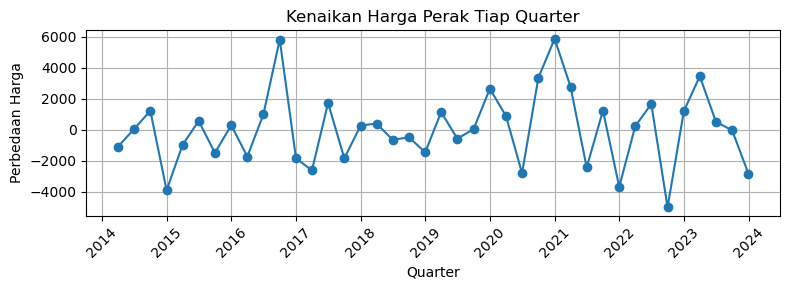

In [11]:
# Membuat plot
plt.figure(figsize=(8, 3))
plt.plot(pergantian_harga_quarter.index, pergantian_harga_quarter['Harga'], marker='o', linestyle='-')
plt.title('Kenaikan Harga Perak Tiap Quarter')
plt.xlabel('Quarter')
plt.ylabel('Perbedaan Harga')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

Data kenaikan harga perak tiap quarter dari tahun 2013 hingga 2023 mencerminkan fluktuasi harga yang tidak terlalu signifikan. Tidak terdapat tren yang konsisten, melainkan fluktuasi harga yang tidak teratur. Beberapa quarter mengalami peningkatan harga yang lumayan tinggi seperti pada pertengahan q3 2016-2017 dan pada awal tahun 2021, sementara ada penurunan harga yang, lumayan signifikan lain ada pada tahun 2015 awal, pertengahan tahun 2020,2021, awal tahun 2022, dan akhir tahun 2022. 

In [13]:
# Menghitung perubahan persentase harian dalam harga Perak
df['Daily_Return'] = df['Harga'].pct_change()

# Menghitung deviasi standar dari perubahan persentase harian
volatility = np.std(df['Daily_Return'])

print(f'Volatilitas Harian Harga Perak: {volatility:.2%}')

Volatilitas Harian Harga Perak: 3.29%


volatilitas harian harga Perak sebesar 3.29% menunjukkan bahwa harga Perak cenderung mengalami fluktuasi harian sekitar 3.29% dari nilai rata-rata historisnya.

In [23]:
seller_tokped = df_tokped['seller'].count()
seller_blibli = df_blibli['seller'].count()
seller_bupak = df_bupak['seller'].count()

print(f"total seller tokopedia:", seller_tokped)
print(f"total seller blibli:", seller_blibli)
print(f"total seller bukalapak:", seller_bupak)

total seller tokopedia: 182
total seller blibli: 10
total seller bukalapak: 37


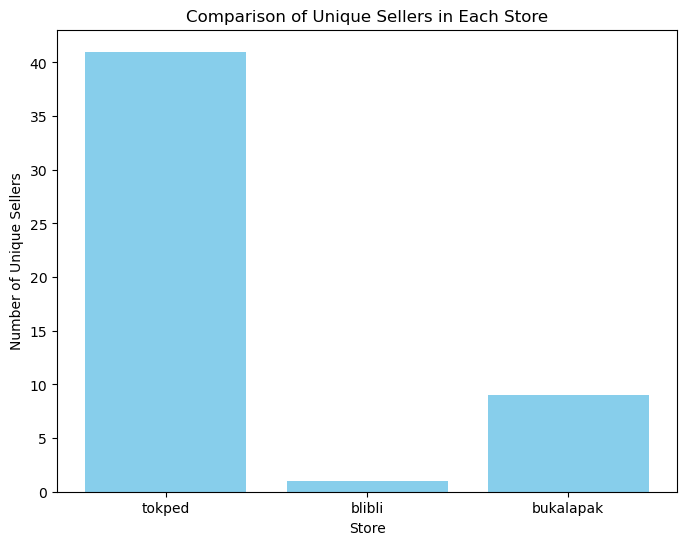

In [24]:
unique_sellers_count = {
    'tokped': len(df_tokped['seller'].unique()),
    'blibli': len(df_blibli['seller'].unique()),
    'bukalapak': len(df_bupak['seller'].unique())
}
plt.figure(figsize=(8, 6))
plt.bar(unique_sellers_count.keys(), unique_sellers_count.values(), color='skyblue')
plt.xlabel('Store')
plt.ylabel('Number of Unique Sellers')
plt.title('Comparison of Unique Sellers in Each Store')
plt.show()


dari hasil pengecekan seller diatas, data seller paling banyak berada pada tokopedia, diikuti oleh buka lapak dan yang terakhir adalah blibli

In [19]:
store_df = pd.concat([df_bupak, df_blibli, df_tokped], ignore_index=True)
store_df

,Unnamed: 0,product_name,price,seller,location,number_sold,rating,link
0,0,Koin Perak Lunar Monkey King 1oz Australia 1 o...,"1,400,000.00",LAPAK OKBOS,Bekasi,0.00,0.00,https://www.bukalapak.com/p/hobi-koleksi/kolek...
1,1,KOIN PERAK LANGKA 10 DIRHAM PUNOKAWAN IMN HERI...,"770,000.00",Royal Spot,Surabaya,0.00,0.00,https://www.bukalapak.com/p/logam-mulia/emas/4...
2,2,KOIN PERAK SCOTTSDALE OMNIA 1 OZ SILVER ROUND ...,"799,000.00",Royal Spot,Surabaya,0.00,0.00,https://www.bukalapak.com/p/hobi-koleksi/kolek...
3,3,Koin Perak Britannia 2020 1 oz Silver Bullion ...,"689,000.00",aminali,Jakarta Selatan,0.00,0.00,https://www.bukalapak.com/p/hobi-koleksi/kolek...
4,4,Koin Perak 1 oz COLOSSUS OF RHODES world wonde...,"750,000.00",antik unik,Jakarta Timur,0.00,0.00,https://www.bukalapak.com/p/logam-mulia/gift-l...
...,...,...,...,...,...,...,...,...
224,177,Koin Perak Australia Lunar Pig 2019 1 oz Silve...,"749,000.00",GOLD DINAR,Jakarta Timur,9.00,5.00,https://ta.tokopedia.com/promo/v1/clicks/8a-xg...
225,178,Koin Perak Republic Chad 2018 Mandala Lion - 1...,"1,000,000.00",Nurse cell,Kab. Sukabumi,3.00,4.00,https://www.tokopedia.com/nursecell/koin-perak...
226,179,PRO] SILVER PERAK ISILVER NABI NUH 1oZ (31.1gr...,"690,000.00",PACIH,Depok,9.00,5.00,https://www.tokopedia.com/pacih/pro-silver-per...
227,180,Perak Batangan Nadir - Silver Nadir Turki 100 ...,"1,950,000.00",shelinlurashop,Tangerang Selatan,500.00,5.00,https://ta.tokopedia.com/promo/v1/clicks/8a-xg...


In [25]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    229 non-null    int64  
 1   product_name  229 non-null    object 
 2   price         229 non-null    float64
 3   seller        229 non-null    object 
 4   location      229 non-null    object 
 5   number_sold   229 non-null    float64
 6   rating        229 non-null    object 
 7   link          229 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 14.4+ KB


In [30]:
store_df['price'].describe()

count         229.00
mean      820,539.51
std       718,664.40
min           646.80
25%       587,020.00
50%       699,000.00
75%       875,000.00
max     5,346,570.00
Name: price, dtype: float64